<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/opencv/HED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference
- [ ] [Github repo - code for Holistically-Nested Edge Detection](https://github.com/s9xie/hed)
- [ ] [paper - Holistically-Nested Edge Detection](https://arxiv.org/abs/1504.06375)

In [1]:
!wget https://raw.githubusercontent.com/s9xie/hed/master/examples/hed/deploy.prototxt
!wget http://vcl.ucsd.edu/hed/hed_pretrained_bsds.caffemodel

--2019-12-08 07:59:34--  https://raw.githubusercontent.com/s9xie/hed/master/examples/hed/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8186 (8.0K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]   7.99K  --.-KB/s    in 0s      

2019-12-08 07:59:34 (120 MB/s) - ‘deploy.prototxt’ saved [8186/8186]



In [0]:
import cv2
import matplotlib.pyplot as plt
from skimage import data, io

In [0]:
class CropLayer(object):
    def __init__(self, params, blobs):
        self.xstart = 0
        self.xend = 0
        self.ystart = 0
        self.yend = 0

    def getMemoryShapes(self, inputs):
        inputShape, targetShape = inputs[0], inputs[1]
        batchSize, numChannels = inputShape[0], inputShape[1]
        height, width = targetShape[2], targetShape[3]

        self.ystart = (inputShape[2] - targetShape[2]) // 2
        self.xstart = (inputShape[3] - targetShape[3]) // 2
        self.yend = self.ystart + height
        self.xend = self.xstart + width
        return [[batchSize, numChannels, height, width]]

    def forward(self, inputs):
        return [inputs[0][:,:,self.ystart:self.yend,self.xstart:self.xend]]

In [0]:
cv2.dnn_registerLayer('Crop', CropLayer)

# Load the model.
net = cv2.dnn.readNet("./deploy.prototxt", "./hed_pretrained_bsds.caffemodel")

timg = data.retina()

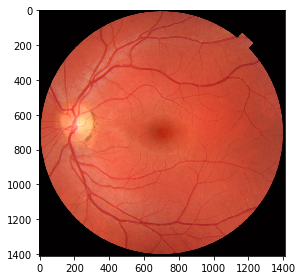

In [4]:
io.imshow(timg)

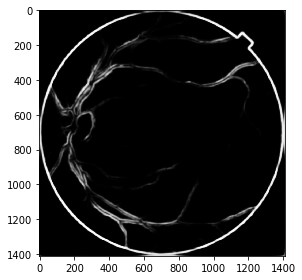

In [5]:
inp = cv2.dnn.blobFromImage(timg, scalefactor=1.0, size=(500, 500),
                            mean=(104.00698793, 116.66876762, 122.67891434),
                            swapRB=False, crop=False)
net.setInput(inp)
out = net.forward()
out = out[0, 0]
out = cv2.resize(out, (timg.shape[1], timg.shape[0]))
io.imshow(out)